**PREREQUISITOS PARA EL NOTEBOOK**

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 req

In [ ]:
!pip install stop-words


  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32894 sha256=2d469a517b0c1a6379358869d0abba11c91099c4f580745493ce95d409a3a9f5
  Stored in directory: /root/.cache/pip/wheels/8f/a5/51/a5405e1da5d178491b79d12cc81b6cb9bb14fe2c8c632eba70
Successfully built stop-words


In [ ]:

import random
import numpy as np
import pandas as pd
from collections import Counter
from nltk import ngrams
from nltk.probability import FreqDist
from stop_words import get_stop_words
import unicodedata
import re


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve

import matplotlib.pyplot as plt

**CARGA DEL DATASET**

In [ ]:
#Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Cargar y crear un dataframe

import pandas as pd


file_path = '/content/drive/MyDrive/NLP_Practica/reviews_Apps_for_Android_5.json'

# Cargar JSON
df = pd.read_json(file_path, lines=True)

df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1N4O8VOJZTDVB,B004A9SDD8,Annette Yancey,"[1, 1]","Loves the song, so he really couldn't wait to ...",3,Really cute,1383350400,"11 2, 2013"
1,A2HQWU6HUKIEC7,B004A9SDD8,"Audiobook lover ""Kathy""","[0, 0]","Oh, how my little grandson loves this app. He'...",5,2-year-old loves it,1323043200,"12 5, 2011"
2,A1SXASF6GYG96I,B004A9SDD8,Barbara Gibbs,"[0, 0]",I found this at a perfect time since my daught...,5,Fun game,1337558400,"05 21, 2012"
3,A2B54P9ZDYH167,B004A9SDD8,"Brooke Greenstreet ""Babylove""","[3, 4]",My 1 year old goes back to this game over and ...,5,We love our Monkeys!,1354752000,"12 6, 2012"
4,AFOFZDTX5UC6D,B004A9SDD8,C. Galindo,"[1, 1]",There are three different versions of the song...,5,This is my granddaughters favorite app on my K...,1391212800,"02 1, 2014"


In [ ]:
# Conservar columnas necesarias
df = df[['reviewText', 'overall']]


df.head()


,reviewText,overall
0,"Loves the song, so he really couldn't wait to ...",3
1,"Oh, how my little grandson loves this app. He'...",5
2,I found this at a perfect time since my daught...,5
3,My 1 year old goes back to this game over and ...,5
4,There are three different versions of the song...,5


In [ ]:
# Conteo de frecuencia

df['overall'].value_counts().sort_index()

df['overall'].value_counts(normalize=True).sort_index() * 100


,proportion
overall,
1,10.454128
2,5.894916
3,11.305196
4,20.995249
5,51.350511


/tmp/ipython-input-7-2976619346.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='overall', palette='viridis')


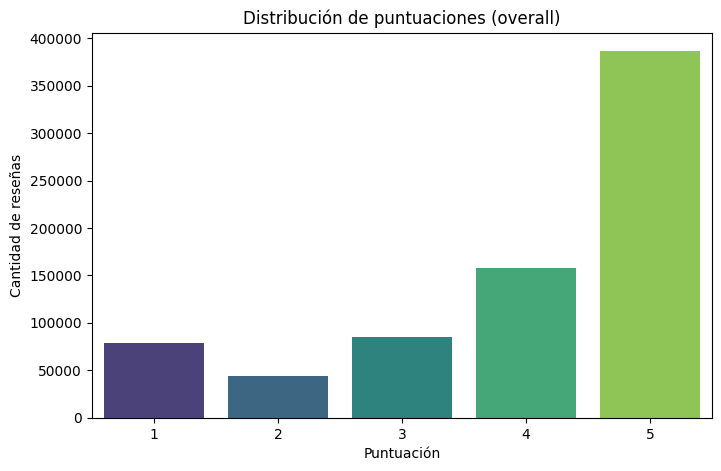

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='overall', palette='viridis')
plt.title('Distribución de puntuaciones (overall)')
plt.xlabel('Puntuación')
plt.ylabel('Cantidad de reseñas')
plt.show()

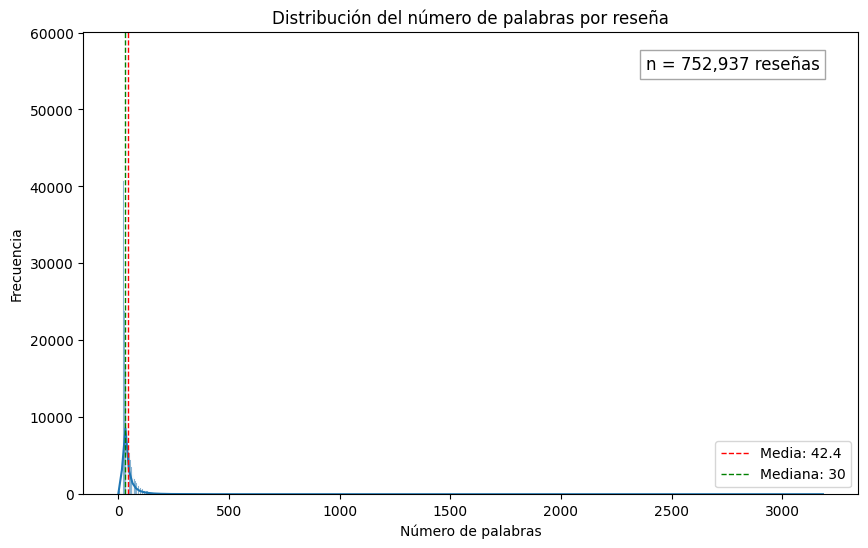

In [ ]:
#Analisis de nº palabras por Review

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = df.dropna(subset=['reviewText'])

word_counts = [len(text.split()) for text in df['reviewText']]


mean_words = np.mean(word_counts)
median_words = np.median(word_counts)
num_reviews = len(word_counts)


plt.figure(figsize=(10, 6))
sns.histplot(word_counts, kde=True)
plt.title('Distribución del número de palabras por reseña')
plt.xlabel('Número de palabras')
plt.ylabel('Frecuencia')


plt.axvline(mean_words, color='r', linestyle='dashed', linewidth=1, label=f'Media: {mean_words:.1f}')
plt.axvline(median_words, color='g', linestyle='dashed', linewidth=1, label=f'Mediana: {median_words:.0f}')


plt.text(0.95, 0.95, f'n = {num_reviews:,} reseñas',
         horizontalalignment='right',
         verticalalignment='top',
         transform=plt.gca().transAxes,
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

plt.legend()
plt.show()


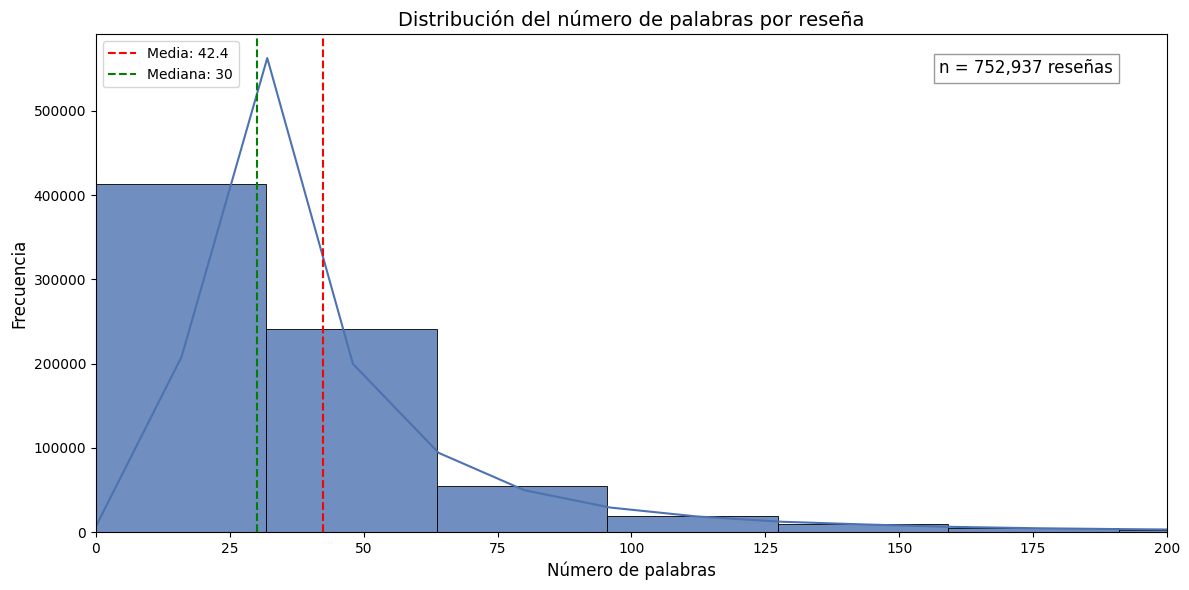

In [ ]:
#Analisis de nº palabras por Review ampliado
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = df.dropna(subset=['reviewText'])


word_counts = [len(text.split()) for text in df['reviewText']]


mean_words = np.mean(word_counts)
median_words = np.median(word_counts)
num_reviews = len(word_counts)


plt.figure(figsize=(12, 6))
sns.histplot(word_counts, bins=100, kde=True, color='#4C72B0', alpha=0.8)
plt.xlim(0, 200)

plt.title('Distribución del número de palabras por reseña', fontsize=14)
plt.xlabel('Número de palabras', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)


plt.axvline(mean_words, color='red', linestyle='--', linewidth=1.5, label=f'Media: {mean_words:.1f}')
plt.axvline(median_words, color='green', linestyle='--', linewidth=1.5, label=f'Mediana: {median_words:.0f}')


plt.text(0.95, 0.95, f'n = {num_reviews:,} reseñas',
         transform=plt.gca().transAxes,
         horizontalalignment='right',
         verticalalignment='top',
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.legend()
plt.tight_layout()
plt.show()

**CARDINALIDAD DEL VOCABULARIO**

In [ ]:
#Cardinalidad del Dataset

from collections import Counter

text = ' '.join(df['reviewText'].dropna()).lower()

# Tokenizamos
words = text.split()

# Contamos frecuencia
vocab = Counter(words)

# Cardinalidad
print("Cardinalidad del vocabulario:", len(vocab))


Cardinalidad del vocabulario: 560189


In [ ]:

#Cardinalidad  sin Stopwords

import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


stop_words = set(stopwords.words('english'))


words_cleaned = []

for text in df['reviewText'].dropna():
    tokens = re.findall(r'\b\w+\b', text.lower())
    tokens = [word for word in tokens if word not in stop_words]
    words_cleaned.extend(tokens)


vocab = Counter(words_cleaned)
print("Cardinalidad del vocabulario sin stopwords:", len(vocab))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Cardinalidad del vocabulario sin stopwords: 163818


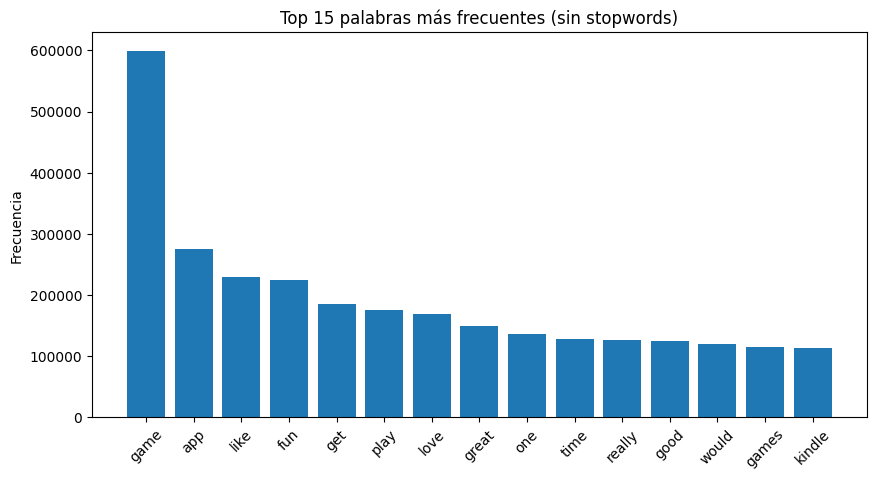

In [ ]:
import matplotlib.pyplot as plt

top_words = vocab.most_common(15)
words, freqs = zip(*top_words)

plt.figure(figsize=(10,5))
plt.bar(words, freqs)
plt.xticks(rotation=45)
plt.title("Top 15 palabras más frecuentes (sin stopwords)")
plt.ylabel("Frecuencia")
plt.show()


**CREAMOS EL DATAFRAME**

**EXPLORACION POR SENTIMIENTO POR ESTRELLAS.YA LO HICIMOS ANTES EN REALIDAD**

**TRANSFORMACION A BINARIO DEL PROBLEMA**

**Deberiamos de crear problema binario pero considerando 1-2 y 4-5 .Eliminamos los valores de 3**

In [ ]:

#Transformacion en problema binario

import pandas as pd

# Filtrar y crear listas
reviews_text = []
reviews_sentiment = []

for _, row in df.iterrows():
    score = row['overall']
    text = row['reviewText']

    if pd.isna(text):
        continue

    if score in [1, 2]:
        reviews_text.append(text)
        reviews_sentiment.append(0)  #Neg
    elif score in [4, 5]:
        reviews_text.append(text)
        reviews_sentiment.append(1)  # Posit


# DataFrame final
df_binary = pd.DataFrame({
    'review': reviews_text,
    'sentiment': reviews_sentiment
})


df_binary.dropna(subset=['review', 'sentiment'], inplace=True)
df_binary.reset_index(drop=True, inplace=True)


print("Shape del dataset binario:", df_binary.shape)
df_binary.head()


Shape del dataset binario: (667816, 2)


,review,sentiment
0,"Oh, how my little grandson loves this app. He'...",1
1,I found this at a perfect time since my daught...,1
2,My 1 year old goes back to this game over and ...,1
3,There are three different versions of the song...,1
4,THis is just so cute and a great app for littl...,1


In [ ]:
#Reducimos el dataframe a 100.000 reviews para hacerlo mas manejabe a efectos de entrenamiento
df_binary_sample = df_binary.sample(n=100000, random_state=42).copy()


In [ ]:
df_binary_sample['sentiment'].value_counts().rename(index={0: 'Negativas', 1: 'Positivas'})


,count
sentiment,
Positivas,81471
Negativas,18529


In [ ]:
df_binary_sample['sentiment'].value_counts(normalize=True).rename(index={0: 'Negativas', 1: 'Positivas'}) * 100


,proportion
sentiment,
Positivas,81.471
Negativas,18.529


**ANALISIS DE NGRAMS**

In [ ]:

from nltk import ngrams
from nltk.probability import FreqDist
import re

# Concatenar
text = ' '.join(df_binary_sample['review'].dropna()).lower()

# Tokenizar
words = re.findall(r'\b\w+\b', text)

# bigramas y trigramas
bigrams_ = list(ngrams(words, 2))
trigrams_ = list(ngrams(words, 3))

# Calcular frecuencia
bigrams_freq_ = FreqDist(bigrams_)
trigrams_freq_ = FreqDist(trigrams_)

# 10 más comunes
print("🔹 Top 10 Bigramas más frecuentes:")
for bigram, freq in bigrams_freq_.most_common(10):
    print(f"{' '.join(bigram)}: {freq}")

print("\n🔸 Top 10 Trigramas más frecuentes:")
for trigram, freq in trigrams_freq_.most_common(10):
    print(f"{' '.join(trigram)}: {freq}")



🔹 Top 10 Bigramas más frecuentes:
this game: 31984
it is: 18096
this app: 18043
it s: 16806
this is: 14949
is a: 14311
the game: 13854
i love: 12966
of the: 12747
don t: 12056

🔸 Top 10 Trigramas más frecuentes:
this game is: 8364
this is a: 6291
i don t: 4468
love this game: 4305
i love this: 4267
on my kindle: 4262
a lot of: 3718
my kindle fire: 3644
this app is: 3431
you have to: 3148


In [ ]:
#Sin stopwords
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.probability import FreqDist
import re
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


text = ' '.join(df_binary_sample['review'].dropna()).lower()


words = re.findall(r'\b\w+\b', text)
words = [w for w in words if w not in stop_words]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# ngrams sin stopwords
bigrams_ = list(ngrams(words, 2))
trigrams_ = list(ngrams(words, 3))

#Frecuencia
bigrams_freq_ = FreqDist(bigrams_)
trigrams_freq_ = FreqDist(trigrams_)

#Mostrar los 10 más comunes
print("🔹 Top 10 Bigramas más frecuentes (sin stopwords):")
for bigram, freq in bigrams_freq_.most_common(10):
    print(f"{' '.join(bigram)}: {freq}")

print("\n🔸 Top 10 Trigramas más frecuentes (sin stopwords):")
for trigram, freq in trigrams_freq_.most_common(10):
    print(f"{' '.join(trigram)}: {freq}")


🔹 Top 10 Bigramas más frecuentes (sin stopwords):
kindle fire: 7717
love game: 5172
fun game: 3967
great game: 3800
game fun: 3085
game play: 2601
good game: 2478
like game: 2415
would recommend: 2335
play game: 2049

🔸 Top 10 Trigramas más frecuentes (sin stopwords):
kindle fire hd: 1417
best game ever: 576
free app day: 530
great kindle fire: 526
would recommend game: 501
really like game: 501
way pass time: 497
hidden object games: 478
game really fun: 447
game much fun: 422


**REPRESENTACION DE NUBES PALABRAS, EL CODIGO PARTE DE UN DATAFRAME QUE SE DIVIDE.SINO DIVIDIMOS HAY QUE HACERLO DE OTRA MANERA(SI DIVIDIMOS LUEGO HAY QUE UNIFICAR)**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipython-input-26-2377477412.py:45: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-26-2377477412.py:45: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


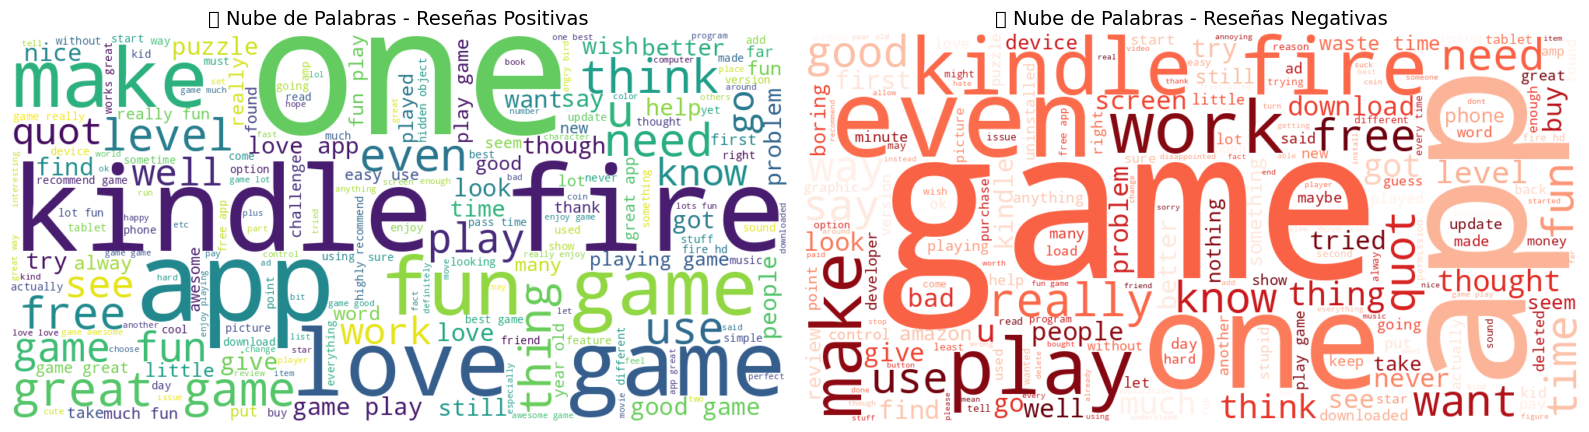

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import nltk


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def clean_text(text_series):
    text = ' '.join(text_series.dropna()).lower()
    words = re.findall(r'\b\w+\b', text)
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

# Separar reviews por sentimiento
positive_reviews = df_binary_sample[df_binary_sample['sentiment'] == 1]['review']
negative_reviews = df_binary_sample[df_binary_sample['sentiment'] == 0]['review']

# Texto limpio por clase
positive_text = clean_text(positive_reviews)
negative_text = clean_text(negative_reviews)

# Crear WordClouds
wordcloud_pos = WordCloud(width=1000, height=500, background_color='white', max_words=200).generate(positive_text)
wordcloud_neg = WordCloud(width=1000, height=500, background_color='white', max_words=200, colormap='Reds').generate(negative_text)

# Visualización
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('🔵 Nube de Palabras - Reseñas Positivas', fontsize=14)

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('🔴 Nube de Palabras - Reseñas Negativas', fontsize=14)

plt.tight_layout()
plt.show()


**CREAMOS UN FLUJO DE WORD2VEC CON EL QUE PODEMOS BUSCAR PALABRAS SIMILARES**

Vocabulario: 12622 palabras
Tiempo para build_vocab: 0.02 min
Tiempo para entrenar: 1.78 min


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


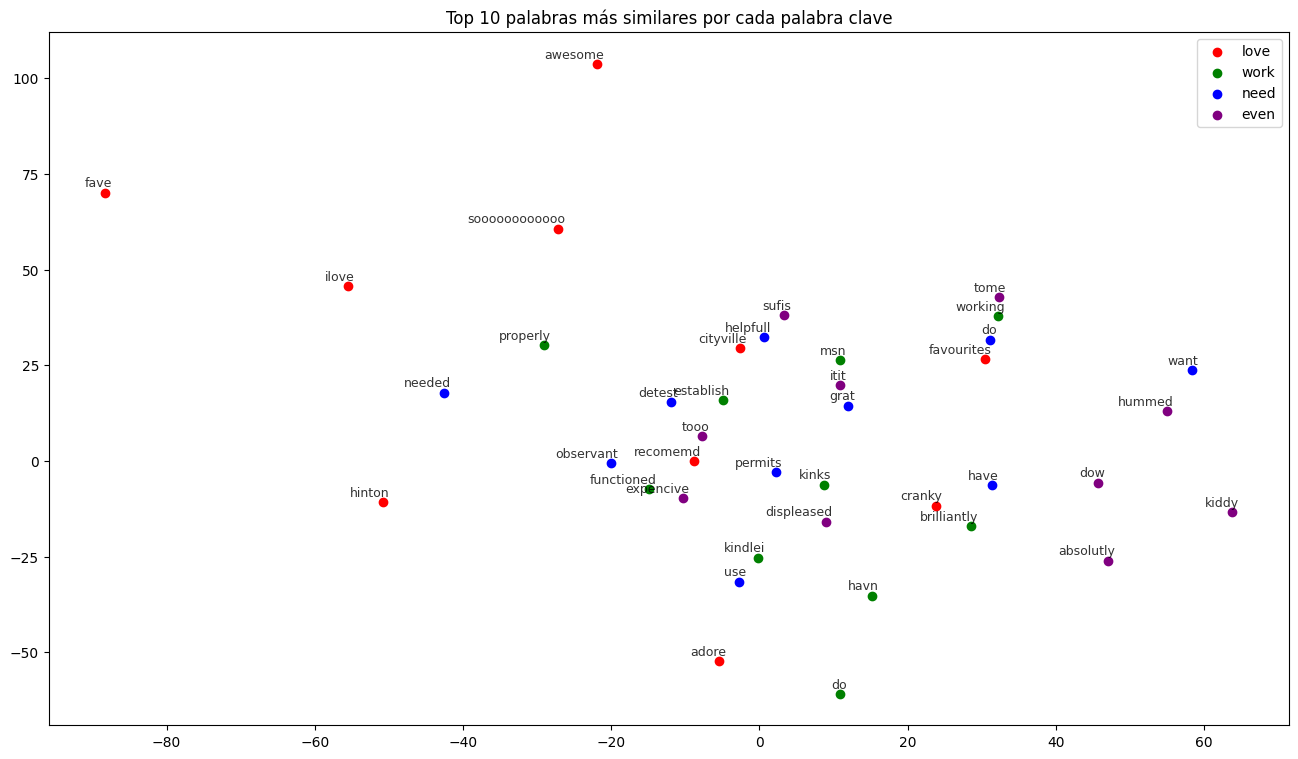

In [ ]:
#Primera visualizacion con las palabras ['love', 'work', 'need', 'even'], empleamos un criterio de eleccion de palabras no principales(pueden no ser expresivas)
from gensim.models import Word2Vec
from time import time
import multiprocessing


cores = multiprocessing.cpu_count()

# ======================
# Preparamos los datos
# ======================


import re
df_binary_sample['review_clean'] = df_binary_sample['review'].str.lower().apply(lambda x: re.findall(r'\b\w+\b', x))


sentences = df_binary_sample['review_clean'].tolist()

# ======================
# Entrenamiento Word2Vec
# ======================

w2v_model = Word2Vec(
    vector_size=100,
    window=5,
    min_count=5,
    workers=cores-1,
    sg=1,
    sample=6e-5,
    alpha=0.03,
    min_alpha=0.0007,
    negative=15
)


t = time()
w2v_model.build_vocab(sentences, progress_per=10000)
print(f"Vocabulario: {len(w2v_model.wv)} palabras")
print("Tiempo para build_vocab:", round((time() - t) / 60, 2), "min")


t = time()
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=5)
print("Tiempo para entrenar:", round((time() - t) / 60, 2), "min")

# ==========================
# Visualización de vectores
# ==========================

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


keys = ['love', 'work', 'need', 'even']

embedding_clusters = []
word_clusters = []

for word in keys:
    if word in w2v_model.wv:
        similar_words = w2v_model.wv.most_similar(word, topn=10)
        embeddings = []
        words = []
        for sim_word, _ in similar_words:
            words.append(sim_word)
            embeddings.append(w2v_model.wv[sim_word])
        embedding_clusters.append(embeddings)
        word_clusters.append(words)


embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=3500, random_state=42)
embeddings_2d = np.array([tsne_model.fit_transform(cluster) for cluster in embedding_clusters])


plt.figure(figsize=(16, 9))
colors = ['red', 'green', 'blue', 'purple', 'orange']
for i, (label, embeddings) in enumerate(zip(keys, embeddings_2d)):
    x = embeddings[:, 0]
    y = embeddings[:, 1]
    plt.scatter(x, y, c=colors[i], label=label)
    for j, word in enumerate(word_clusters[i]):
        plt.annotate(word, alpha=0.8, xy=(x[j], y[j]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', fontsize=9)
plt.title("Top 10 palabras más similares por cada palabra clave")
plt.legend()
plt.show()


✅ Vocabulario: 12622 palabras
⏳ Tiempo para build_vocab: 0.02 min
✅ Entrenamiento completo
⏳ Tiempo para entrenar: 5.07 min


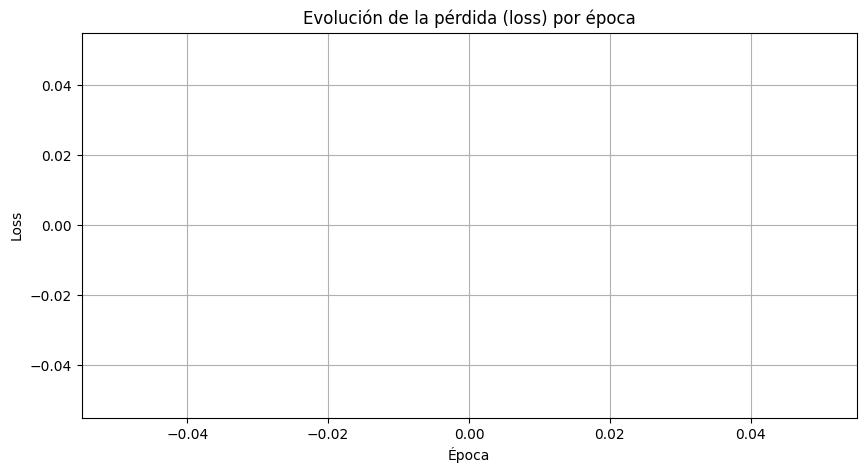

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


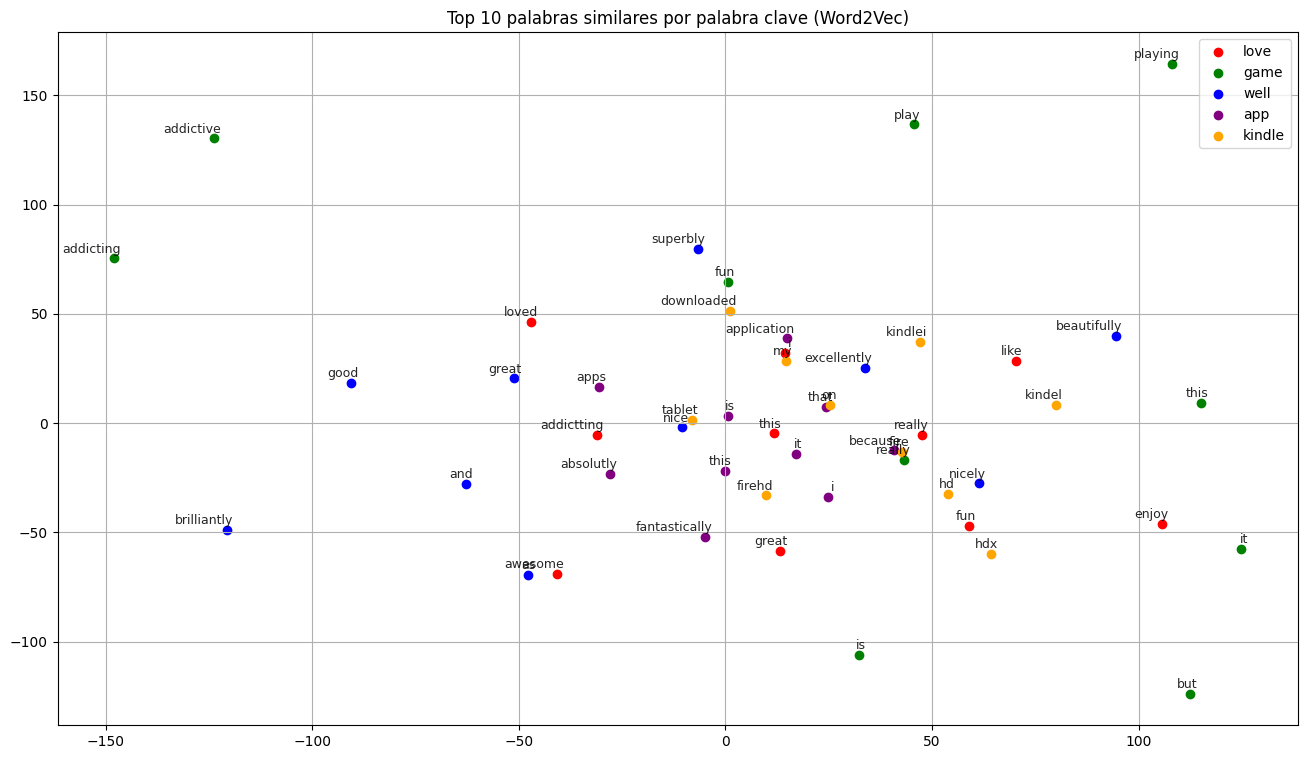

In [ ]:
#Visualizacion empleando palabras mas generales ['love', 'game', 'well', 'app', 'kindle']

from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
from time import time
import multiprocessing
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.manifold import TSNE

# --------------------------
# CallBack para visualizar el loss
# --------------------------
class EpochLogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
        self.losses = []

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            self.losses.append(loss)
        else:
            self.losses.append(loss - self.losses[-1])
        print(f"Epoch #{self.epoch + 1} - Loss: {self.losses[-1]:.4f}")
        self.epoch += 1

# --------------------------
# Preparar datos
# --------------------------

df_binary_sample['review_clean'] = df_binary_sample['review'].str.lower().apply(lambda x: re.findall(r'\b\w+\b', x))
sentences = df_binary_sample['review_clean'].tolist()

# --------------------------
# Entrenamiento Word2Vec con Logger
# --------------------------
cores = multiprocessing.cpu_count()
epoch_logger = EpochLogger()

w2v_model = Word2Vec(
    vector_size=100,
    window=5,
    min_count=5,
    workers=cores - 1,
    sg=1,
    sample=6e-5,
    alpha=0.03,
    min_alpha=0.0007,
    negative=15,
    compute_loss=True,
    callbacks=[epoch_logger]
)


t = time()
w2v_model.build_vocab(sentences, progress_per=10000)
print(f" Vocabulario: {len(w2v_model.wv)} palabras")
print("Tiempo para build_vocab:", round((time() - t) / 60, 2), "min")


t = time()
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=15)
print(" Entrenamiento completo")
print(" Tiempo para entrenar:", round((time() - t) / 60, 2), "min")

# --------------------------
# 📈 Curva de pérdida por época
# --------------------------
plt.figure(figsize=(10,5))
plt.plot(range(1, len(epoch_logger.losses)+1), epoch_logger.losses, marker='o')
plt.title('Evolución de la pérdida (loss) por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# --------------------------
# 🔍 Visualización 2D de palabras similares
# --------------------------
keys = ['love', 'game', 'well', 'app', 'kindle']

embedding_clusters = []
word_clusters = []

for word in keys:
    if word in w2v_model.wv:
        similar_words = w2v_model.wv.most_similar(word, topn=10)
        embeddings = []
        words = []
        for sim_word, _ in similar_words:
            words.append(sim_word)
            embeddings.append(w2v_model.wv[sim_word])
        embedding_clusters.append(embeddings)
        word_clusters.append(words)

embedding_clusters = np.array(embedding_clusters)


n_words_per_cluster = embedding_clusters.shape[1]
perplexity = min(5, n_words_per_cluster - 1)


tsne_model = TSNE(
    perplexity=perplexity,
    n_components=2,
    init='pca',
    random_state=42,
    n_iter=3500
)
embeddings_2d = np.array([tsne_model.fit_transform(cluster) for cluster in embedding_clusters])


plt.figure(figsize=(16, 9))
colors = ['red', 'green', 'blue', 'purple', 'orange']
for i, (label, embeddings) in enumerate(zip(keys, embeddings_2d)):
    x = embeddings[:, 0]
    y = embeddings[:, 1]
    plt.scatter(x, y, c=colors[i], label=label)
    for j, word in enumerate(word_clusters[i]):
        plt.annotate(word, alpha=0.85, xy=(x[j], y[j]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', fontsize=9)
plt.title("Top 10 palabras similares por palabra clave (Word2Vec)")
plt.legend()
plt.grid(True)
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Vocabulario: 12473 palabras
⏳ Tiempo para build_vocab: 0.01 min
✅ Entrenamiento completo
⏳ Tiempo para entrenar: 3.44 min


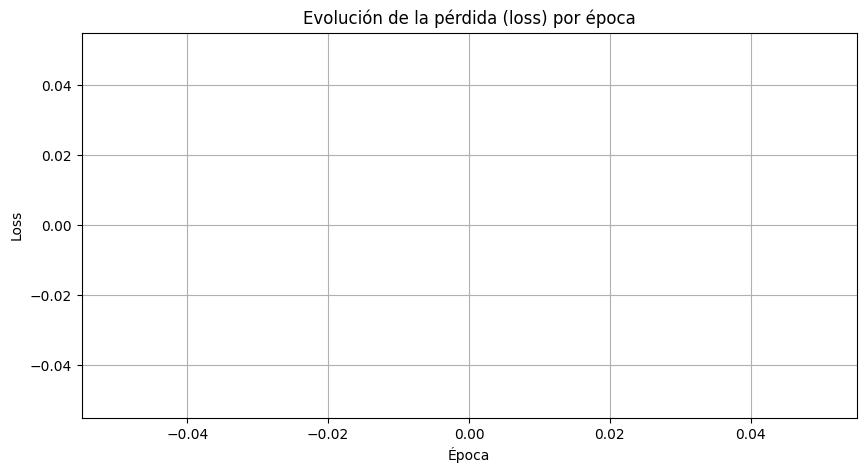

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


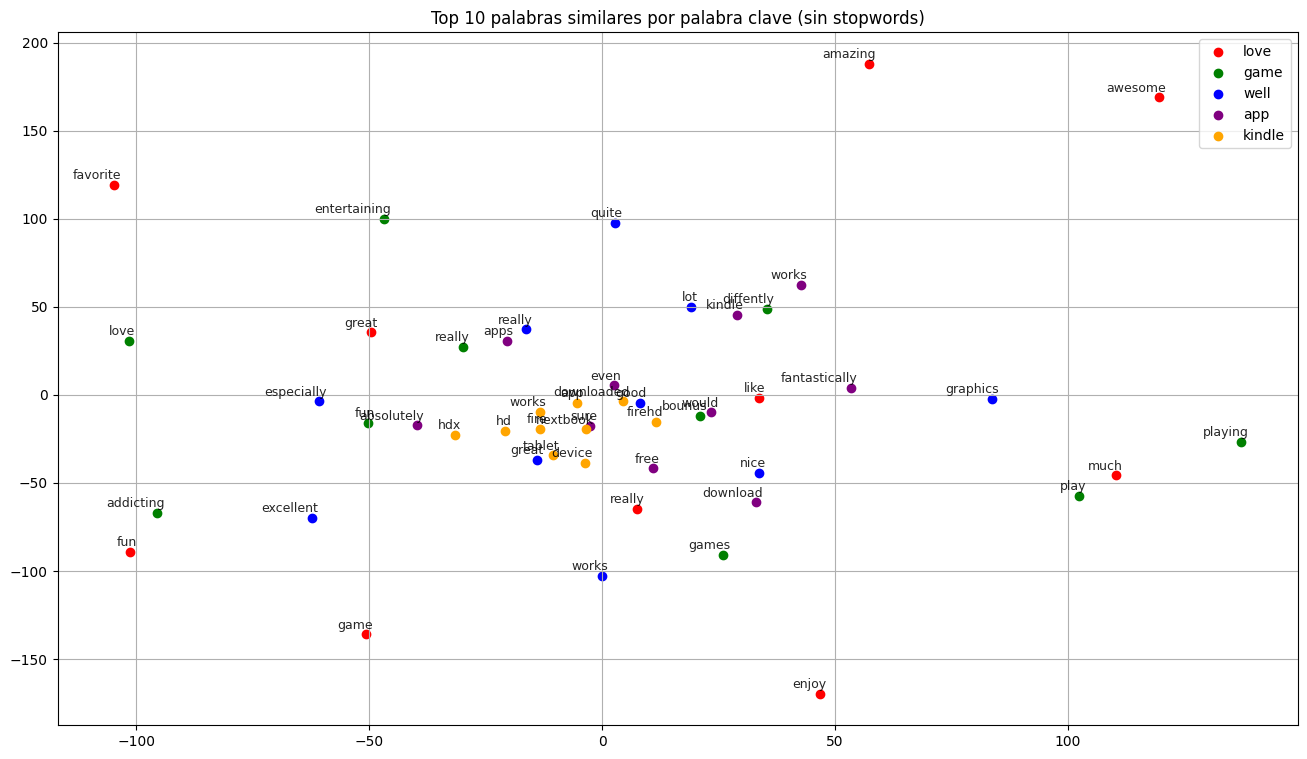

In [ ]:
#Visualizacion sin Stopwords y mismas palabras que visualizacion 2 ['love', 'game', 'well', 'app', 'kindle']
'''
Posibles mejoras : Tienes muchas palabras muy juntas en el centro (como download, device, great, would, even, etc.). Puedes mejorar:

    Separabilidad bajando el perplexity a 5–10,

    O subiendo el n_iter para refinar más las posiciones.


    introduccion de lineas :
    plt.plot([x0, x1], [y0, y1], linestyle='--', color='gray')

'''

!pip install gensim wordcloud --quiet


from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
from nltk.corpus import stopwords
import nltk
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import multiprocessing
from time import time


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# -------------------------------
# CALLBACK para visualizar el loss
# -------------------------------
class EpochLogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
        self.losses = []

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            self.losses.append(loss)
        else:
            self.losses.append(loss - self.losses[-1])
        print(f"Epoch #{self.epoch + 1} - Loss: {self.losses[-1]:.4f}")
        self.epoch += 1

# -------------------------------
# 🧹 LIMPIEZA + STOPWORDS
# -------------------------------
def clean_tokens(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    return [w for w in tokens if w not in stop_words]


df_binary_sample['review_clean'] = df_binary_sample['review'].apply(clean_tokens)


sentences = df_binary_sample['review_clean'].tolist()

# -------------------------------
# ENTRENAMIENTO Word2Vec
# -------------------------------
cores = multiprocessing.cpu_count()
epoch_logger = EpochLogger()

w2v_model = Word2Vec(
    vector_size=100,
    window=5,
    min_count=5,
    workers=cores - 1,
    sg=1,
    sample=6e-5,
    alpha=0.03,
    min_alpha=0.0007,
    negative=15,
    compute_loss=True,
    callbacks=[epoch_logger]
)


t = time()
w2v_model.build_vocab(sentences, progress_per=10000)
print(f"Vocabulario: {len(w2v_model.wv)} palabras")
print("Tiempo para build_vocab:", round((time() - t) / 60, 2), "min")

# Entrenamiento
t = time()
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=15)
print("Entrenamiento completo")
print("Tiempo para entrenar:", round((time() - t) / 60, 2), "min")

# -------------------------------
# VISUALIZAR LOSS por época
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(range(1, len(epoch_logger.losses)+1), epoch_logger.losses, marker='o')
plt.title('Evolución de la pérdida (loss) por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# -------------------------------
# VISUALIZACIÓN con t-SNE
# -------------------------------

keys = ['love', 'game', 'well', 'app', 'kindle']

embedding_clusters = []
word_clusters = []

for word in keys:
    if word in w2v_model.wv:
        similar_words = w2v_model.wv.most_similar(word, topn=10)
        embeddings = []
        words = []
        for sim_word, _ in similar_words:
            words.append(sim_word)
            embeddings.append(w2v_model.wv[sim_word])
        embedding_clusters.append(embeddings)
        word_clusters.append(words)

embedding_clusters = np.array(embedding_clusters)


n_words_per_cluster = embedding_clusters.shape[1]
perplexity = min(5, n_words_per_cluster - 1)

tsne_model = TSNE(
    perplexity=perplexity,
    n_components=2,
    init='pca',
    random_state=42,
    n_iter=3500
)
embeddings_2d = np.array([tsne_model.fit_transform(cluster) for cluster in embedding_clusters])


plt.figure(figsize=(16, 9))
colors = ['red', 'green', 'blue', 'purple', 'orange']
for i, (label, embeddings) in enumerate(zip(keys, embeddings_2d)):
    x = embeddings[:, 0]
    y = embeddings[:, 1]
    plt.scatter(x, y, c=colors[i], label=label)
    for j, word in enumerate(word_clusters[i]):
        plt.annotate(word, alpha=0.85, xy=(x[j], y[j]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', fontsize=9)
plt.title("Top 10 palabras similares por palabra clave (sin stopwords)")
plt.legend()
plt.grid(True)
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Vocabulario: 12473 palabras
⏳ Tiempo para build_vocab: 0.01 min
✅ Entrenamiento completo
⏳ Tiempo para entrenar: 3.33 min


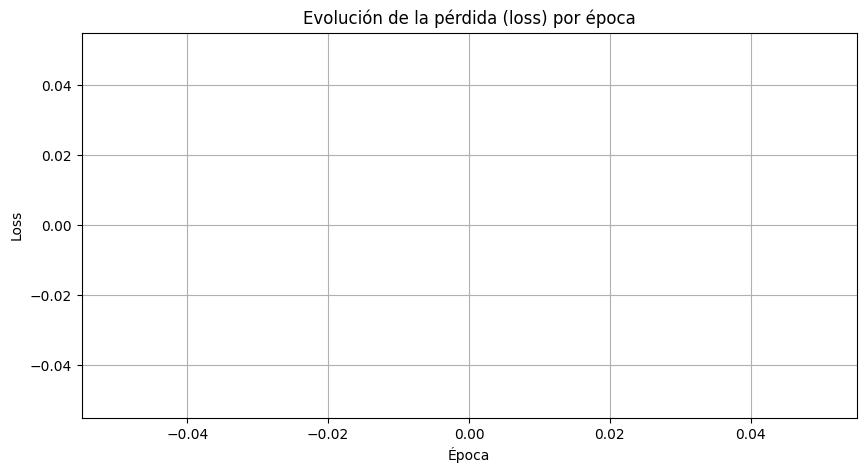

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


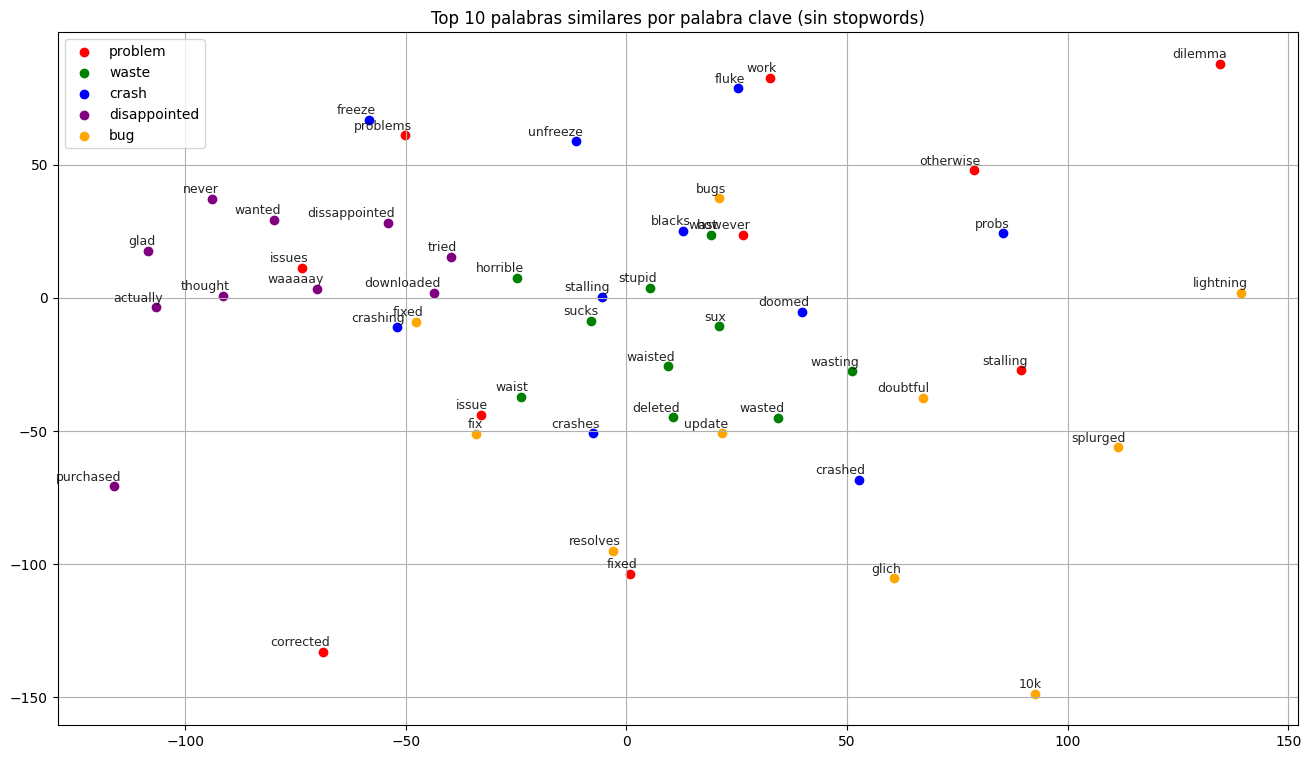

In [ ]:
#Visualizacion sin Stopwords palabras de reseñas Negativas ['problem', 'waste', 'crash', 'disappointed', 'bug']


!pip install gensim wordcloud --quiet


from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
from nltk.corpus import stopwords
import nltk
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import multiprocessing
from time import time


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# -------------------------------
# CALLBACK para visualizar el loss
# -------------------------------
class EpochLogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
        self.losses = []

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            self.losses.append(loss)
        else:
            self.losses.append(loss - self.losses[-1])
        print(f"Epoch #{self.epoch + 1} - Loss: {self.losses[-1]:.4f}")
        self.epoch += 1

# -------------------------------
# LIMPIEZA + STOPWORDS
# -------------------------------
def clean_tokens(text):
    tokens = re.findall(r'\b\w+\b', text.lower())  # minúsculas + solo letras/números
    return [w for w in tokens if w not in stop_words]


df_binary_sample['review_clean'] = df_binary_sample['review'].apply(clean_tokens)


sentences = df_binary_sample['review_clean'].tolist()

# -------------------------------
# ENTRENAMIENTO Word2Vec
# -------------------------------
cores = multiprocessing.cpu_count()
epoch_logger = EpochLogger()

w2v_model = Word2Vec(
    vector_size=100,
    window=5,
    min_count=5,
    workers=cores - 1,
    sg=1,
    sample=6e-5,
    alpha=0.03,
    min_alpha=0.0007,
    negative=15,
    compute_loss=True,
    callbacks=[epoch_logger]
)


t = time()
w2v_model.build_vocab(sentences, progress_per=10000)
print(f"Vocabulario: {len(w2v_model.wv)} palabras")
print("Tiempo para build_vocab:", round((time() - t) / 60, 2), "min")


t = time()
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=15)
print("Entrenamiento completo")
print("Tiempo para entrenar:", round((time() - t) / 60, 2), "min")

# -------------------------------
# VISUALIZAR LOSS por época
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(range(1, len(epoch_logger.losses)+1), epoch_logger.losses, marker='o')
plt.title('Evolución de la pérdida (loss) por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# -------------------------------
# VISUALIZACIÓN con t-SNE
# -------------------------------

keys = ['problem', 'waste', 'crash', 'disappointed', 'bug']

embedding_clusters = []
word_clusters = []

for word in keys:
    if word in w2v_model.wv:
        similar_words = w2v_model.wv.most_similar(word, topn=10)
        embeddings = []
        words = []
        for sim_word, _ in similar_words:
            words.append(sim_word)
            embeddings.append(w2v_model.wv[sim_word])
        embedding_clusters.append(embeddings)
        word_clusters.append(words)

embedding_clusters = np.array(embedding_clusters)


n_words_per_cluster = embedding_clusters.shape[1]
perplexity = min(5, n_words_per_cluster - 1)

tsne_model = TSNE(
    perplexity=perplexity,
    n_components=2,
    init='pca',
    random_state=42,
    n_iter=3500
)
embeddings_2d = np.array([tsne_model.fit_transform(cluster) for cluster in embedding_clusters])


plt.figure(figsize=(16, 9))
colors = ['red', 'green', 'blue', 'purple', 'orange']
for i, (label, embeddings) in enumerate(zip(keys, embeddings_2d)):
    x = embeddings[:, 0]
    y = embeddings[:, 1]
    plt.scatter(x, y, c=colors[i], label=label)
    for j, word in enumerate(word_clusters[i]):
        plt.annotate(word, alpha=0.85, xy=(x[j], y[j]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', fontsize=9)
plt.title("Top 10 palabras similares por palabra clave (sin stopwords)")
plt.legend()
plt.grid(True)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Vocabulario: 12473 palabras
⏳ Tiempo para build_vocab: 0.01 min
✅ Entrenamiento completo
⏳ Tiempo para entrenar: 3.3 min


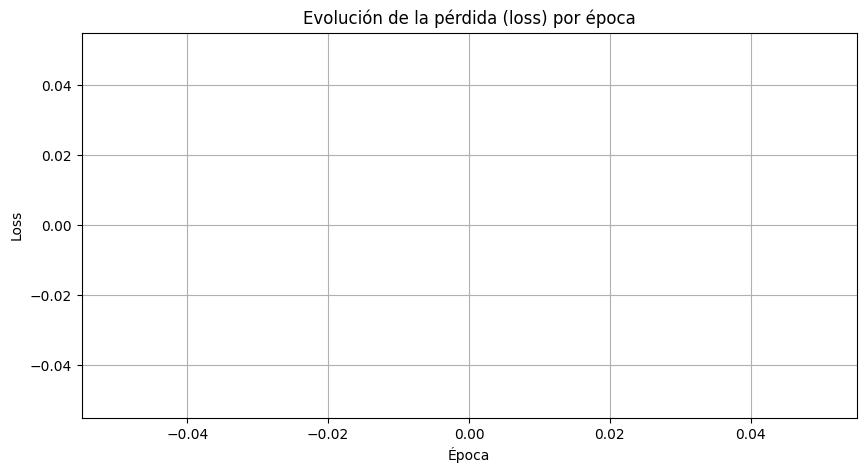

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


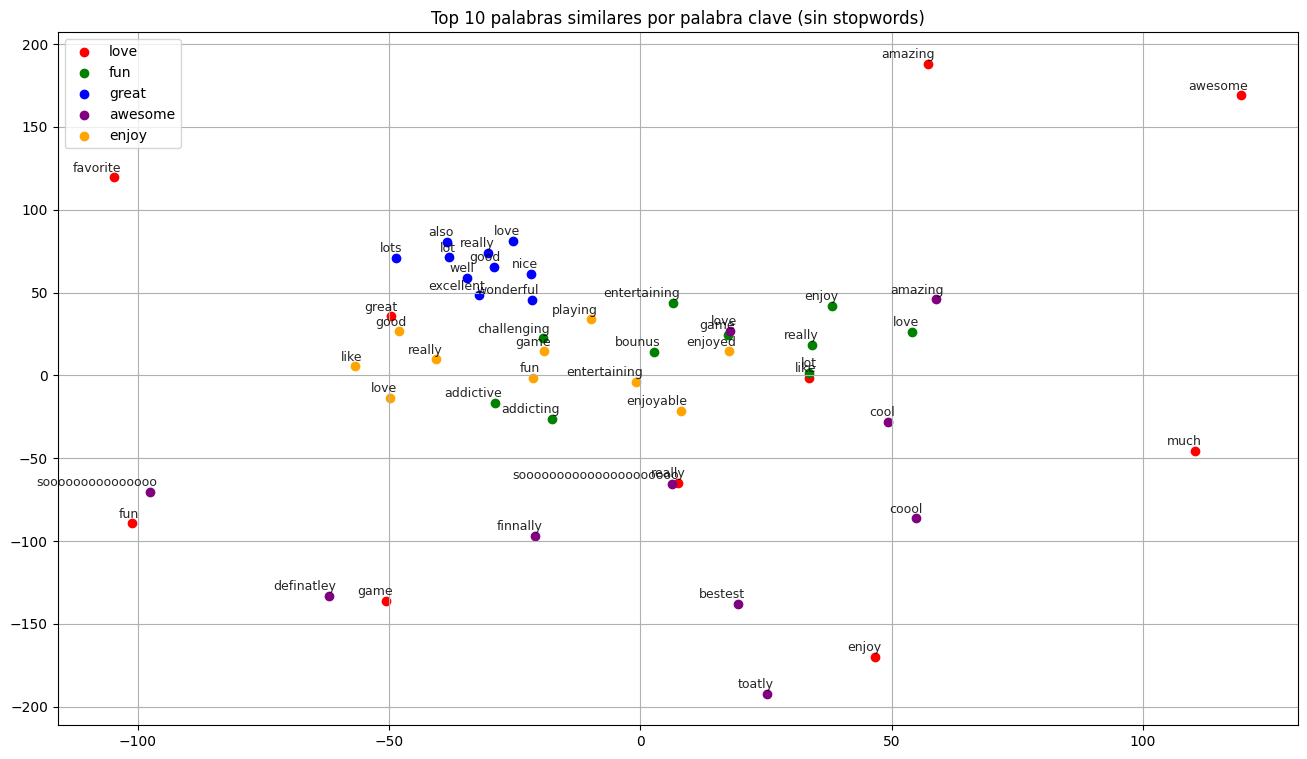

In [ ]:
#Visualizacion sin Stopwords palabras de reseñas positivas ['love', 'fun', 'great', 'awesome', 'enjoy']


!pip install gensim wordcloud --quiet


from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
from nltk.corpus import stopwords
import nltk
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import multiprocessing
from time import time


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# -------------------------------
# CALLBACK para visualizar el loss
# -------------------------------
class EpochLogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
        self.losses = []

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            self.losses.append(loss)
        else:
            self.losses.append(loss - self.losses[-1])
        print(f"Epoch #{self.epoch + 1} - Loss: {self.losses[-1]:.4f}")
        self.epoch += 1

# -------------------------------
# LIMPIEZA + STOPWORDS
# -------------------------------
def clean_tokens(text):
    tokens = re.findall(r'\b\w+\b', text.lower())  # minúsculas + solo letras/números
    return [w for w in tokens if w not in stop_words]


df_binary_sample['review_clean'] = df_binary_sample['review'].apply(clean_tokens)


sentences = df_binary_sample['review_clean'].tolist()

# -------------------------------
# ENTRENAMIENTO Word2Vec
# -------------------------------
cores = multiprocessing.cpu_count()
epoch_logger = EpochLogger()

w2v_model = Word2Vec(
    vector_size=100,
    window=5,
    min_count=5,
    workers=cores - 1,
    sg=1,
    sample=6e-5,
    alpha=0.03,
    min_alpha=0.0007,
    negative=15,
    compute_loss=True,
    callbacks=[epoch_logger]
)


t = time()
w2v_model.build_vocab(sentences, progress_per=10000)
print(f" Vocabulario: {len(w2v_model.wv)} palabras")
print(" Tiempo para build_vocab:", round((time() - t) / 60, 2), "min")


t = time()
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=15)
print(" Entrenamiento completo")
print(" Tiempo para entrenar:", round((time() - t) / 60, 2), "min")

# -------------------------------
#  VISUALIZAR LOSS por época
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(range(1, len(epoch_logger.losses)+1), epoch_logger.losses, marker='o')
plt.title('Evolución de la pérdida (loss) por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# -------------------------------
# VISUALIZACIÓN con t-SNE
# -------------------------------

keys = ['love', 'fun', 'great', 'awesome', 'enjoy']

embedding_clusters = []
word_clusters = []

for word in keys:
    if word in w2v_model.wv:
        similar_words = w2v_model.wv.most_similar(word, topn=10)
        embeddings = []
        words = []
        for sim_word, _ in similar_words:
            words.append(sim_word)
            embeddings.append(w2v_model.wv[sim_word])
        embedding_clusters.append(embeddings)
        word_clusters.append(words)

embedding_clusters = np.array(embedding_clusters)


n_words_per_cluster = embedding_clusters.shape[1]
perplexity = min(5, n_words_per_cluster - 1)

tsne_model = TSNE(
    perplexity=perplexity,
    n_components=2,
    init='pca',
    random_state=42,
    n_iter=3500
)
embeddings_2d = np.array([tsne_model.fit_transform(cluster) for cluster in embedding_clusters])


plt.figure(figsize=(16, 9))
colors = ['red', 'green', 'blue', 'purple', 'orange']
for i, (label, embeddings) in enumerate(zip(keys, embeddings_2d)):
    x = embeddings[:, 0]
    y = embeddings[:, 1]
    plt.scatter(x, y, c=colors[i], label=label)
    for j, word in enumerate(word_clusters[i]):
        plt.annotate(word, alpha=0.85, xy=(x[j], y[j]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', fontsize=9)
plt.title("Top 10 palabras similares por palabra clave (sin stopwords)")
plt.legend()
plt.grid(True)
plt.show()

**HACEMOS UNA REPRESENTACION GRAFICA SOLO PARA EL EDA**

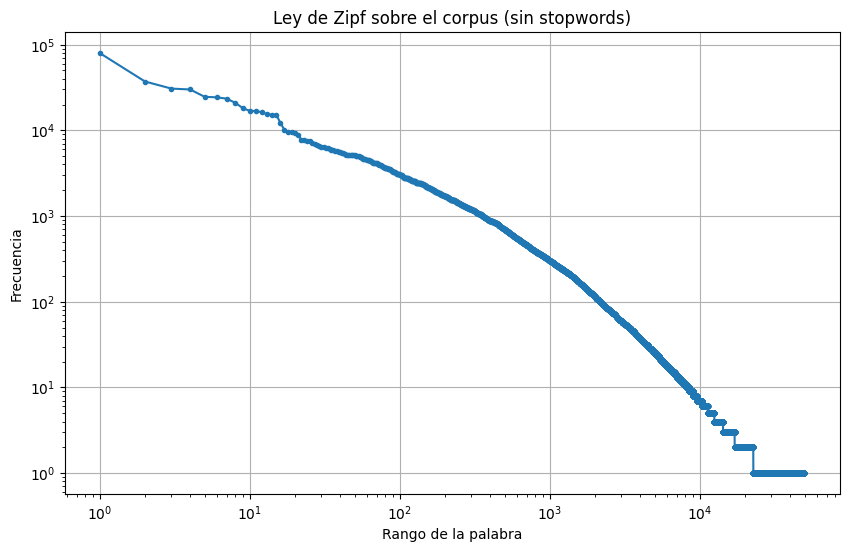

In [ ]:
#Aplicamos ley ZIPF
from collections import Counter
import matplotlib.pyplot as plt

tokens = df_binary_sample['review_clean'].explode()

# Calcular frecuencias
freqs = Counter(tokens)
sorted_freqs = sorted(freqs.values(), reverse=True)

# Representar log
plt.figure(figsize=(10,6))
plt.loglog(range(1, len(sorted_freqs)+1), sorted_freqs, marker='.')
plt.title("Ley de Zipf sobre el corpus (sin stopwords)")
plt.xlabel("Rango de la palabra")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


**OTROS ANALISIS EN EL EDA**

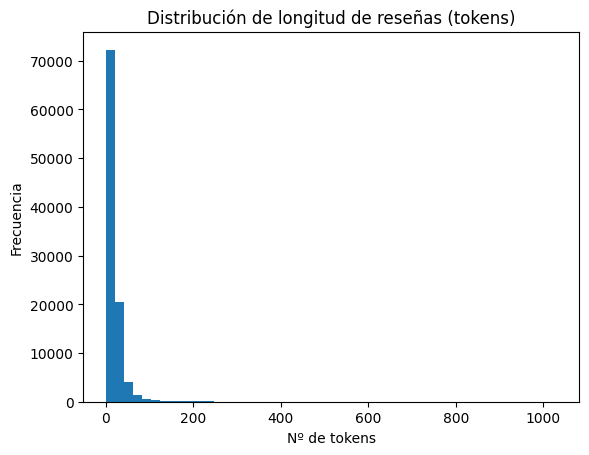

Media: 20.69206
Mediana: 15.0
Percentil 95: 50.0


'\n✅ 1. Distribución de longitud de reseñas (tokens)\n✔️ ¿Por qué es útil?\n\n    Las RNN/LSTM requieren entradas de longitud fija → necesitas saber:\n\n        ¿Qué longitud máxima tiene sentido?\n\n        ¿Dónde cortar (max_len)? ¿Dónde hacer padding?\n\n        ✅ Resultado:\n\nTe permite decidir que max_len = 100 (por ejemplo) cubre el 95% de las reseñas → buen valor para pad_sequences(...).\n\n        '

In [ ]:
#Distribucion de reseñas

lengths = df_binary_sample['review_clean'].apply(len)
plt.hist(lengths, bins=50)
plt.title('Distribución de longitud de reseñas (tokens)')
plt.xlabel('Nº de tokens')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas
print("Media:", lengths.mean())
print("Mediana:", lengths.median())
print("Percentil 95:", lengths.quantile(0.95))



In [ ]:
#Proporción de clases

df_binary_sample['sentiment'].value_counts(normalize=True)


,proportion
sentiment,
1,0.81471
0,0.18529


In [ ]:
#Cobertura de vocabulario

vocab_counter = Counter(df_binary_sample['review_clean'].explode())
vocab_size = len(vocab_counter)
rare_words = sum(1 for w, f in vocab_counter.items() if f <= 2)
print("Tamaño del vocabulario:", vocab_size)
print("Palabras con freq ≤ 2:", rare_words)
print("Cobertura rara:", round(100 * rare_words / vocab_size, 2), "%")



Tamaño del vocabulario: 49762
Palabras con freq ≤ 2: 32725
Cobertura rara: 65.76 %


'\n✔️ ¿Por qué es útil?\n\n    LSTM tiene una capa Embedding(input_dim=..., output_dim=...).\n\n    Necesitas saber cuántas palabras únicas hay, y si tienes muchas que ocurren pocas veces.\n\n\n    ✅ Resultado:\n\nPuedes filtrar vocabulario y definir num_words para tu Tokenizer.\n'

**PREPROCESADO**

In [ ]:
#Preprocesado agrupado por funciones
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import json

def preprocesar_y_split(df, text_col='review_clean', target_col='sentiment', vocab_size=10000, max_len=100, test_size=0.2, random_state=42):


    # Unificar tokens
    def tokens_a_texto(token_list):
        return ' '.join(token_list) if isinstance(token_list, list) else ''

    # Transformación corpus
    df['review_text_clean'] = df[text_col].apply(tokens_a_texto)

    # Eliminar reseñas vacías
    df['review_text_clean'].replace('', np.nan, inplace=True)
    df.dropna(subset=['review_text_clean'], inplace=True)
    df.reset_index(drop=True, inplace=True)

    # Tokenización y creación del vocabulario
    tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
    tokenizer.fit_on_texts(df['review_text_clean'])

    #Extra guardar tokenizador
    def guardar_tokenizer(tokenizer, ruta='tokenizer.json'):
        tokenizer_json = tokenizer.to_json()
        with open(ruta, 'w') as f:
          f.write(tokenizer_json)
        print(f"Tokenizer guardado en: {ruta}")



    # Convertir texto
    sequences = tokenizer.texts_to_sequences(df['review_text_clean'])

    # Padding
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

    # Split estratificado
    X_train, X_test, y_train, y_test = train_test_split(
        padded_sequences,
        df[target_col].values,
        test_size=test_size,
        stratify=df[target_col],
        random_state=random_state
    )

    return X_train, X_test, y_train, y_test, tokenizer




In [ ]:
#Extra1: Carga de tokenizador cuando lo necesitemos para inferencia(para predecir nuevos textos).Sino utilizamos el mismo tokenizador, cuando le demos nuevas palabras las traducira pero utilizara indices diferentes y predicira mal

from tensorflow.keras.preprocessing.text import tokenizer_from_json

# Cargar tokenizer desde archivo
def cargar_tokenizer(ruta='tokenizer.json'):
    with open(ruta) as f:
        tokenizer_data = json.load(f)
        tokenizer = tokenizer_from_json(tokenizer_data)
    print(f"Tokenizer cargado desde: {ruta}")
    return tokenizer




In [ ]:
#Extra 2 : uso del tokenizador

texto_nuevo = ["I really enjoyed this app!"]
secuencia = tokenizer.texts_to_sequences(texto_nuevo)
secuencia_padded = pad_sequences(secuencia, maxlen=100, padding='post')

pred = model.predict(secuencia_padded)
print("Probabilidad de clase positiva:", pred[0][0])


**TRAINING**

Empleamos Chi Cuadrado

**ENTRENO**

**propuesta 1 de pipeline con LSTM**

**Propuesta de entreno modular para RNN y LSTM**

In [ ]:
# Define hiperparámetros
vocab_size = 10000
max_len = 100

In [ ]:
X_train, X_test, y_train, y_test, tokenizer = preprocesar_y_split(
    df_binary_sample,
    vocab_size=vocab_size,
    max_len=max_len
)

/tmp/ipython-input-46-3784111917.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_text_clean'].replace('', np.nan, inplace=True)



🔧 Entrenando modelo: SimpleRNN
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2250/2250 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.8122 - loss: 0.4862 - val_accuracy: 0.8150 - val_loss: 0.4787
Epoch 2/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8147 - loss: 0.4802 - val_accuracy: 0.8150 - val_loss: 0.4776
Epoch 3/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8165 - loss: 0.4771 - val_accuracy: 0.8139 - val_loss: 0.4787
Epoch 4/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8165 - loss: 0.4638 - val_accuracy: 0.8142 - val_loss: 0.4471
Epoch 5/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8162 - loss: 0.4145 - val_accuracy: 0.8117 - val_loss: 0.4632

📈 Evaluando modelo: SimpleRNN
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
🔍 Métricas de evaluación:
Accuracy: 0.8114405720286014
Precision: 0.8151391615078766
Recall: 0.9939855161409108
F1 Score: 0.8957221469457733
ROC-AUC: 0.654642229399163

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.01    

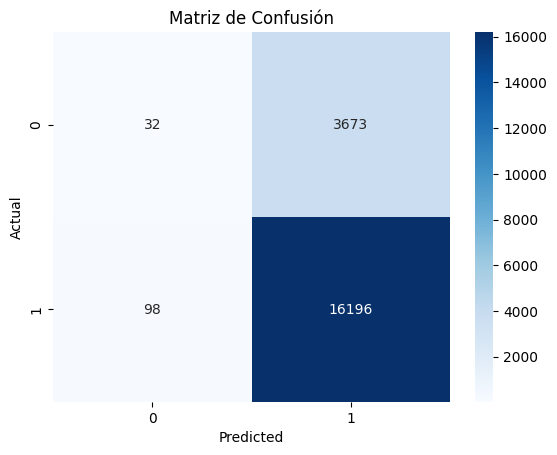


🔧 Entrenando modelo: LSTM
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2250/2250 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8111 - loss: 0.4852 - val_accuracy: 0.8150 - val_loss: 0.4786
Epoch 2/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8154 - loss: 0.4784 - val_accuracy: 0.8152 - val_loss: 0.4806
Epoch 3/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8440 - loss: 0.3986 - val_accuracy: 0.9133 - val_loss: 0.2131
Epoch 4/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9276 - loss: 0.1852 - val_accuracy: 0.9168 - val_loss: 0.2091
Epoch 5/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9467 - loss: 0.1367 - val_accuracy: 0.9164 - val_loss: 0.2217

📈 Evaluando modelo: LSTM
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
🔍 Métricas de evaluación:
Accuracy: 0.9104955247762389
Precision: 0.9381343644272595
Recall: 0.9529888302442617
F1 Score: 0.9455032576264994
ROC-AUC: 0.9455351787424298

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75

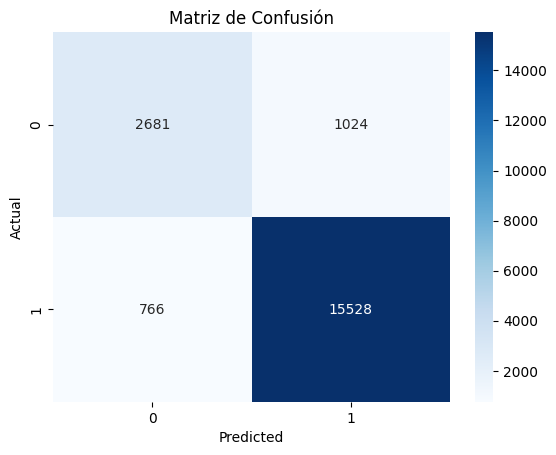


🔧 Entrenando modelo: GRU
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2250/2250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8128 - loss: 0.4827 - val_accuracy: 0.8150 - val_loss: 0.4791
Epoch 2/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.8368 - loss: 0.4208 - val_accuracy: 0.9089 - val_loss: 0.2241
Epoch 3/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9257 - loss: 0.1932 - val_accuracy: 0.9169 - val_loss: 0.2101
Epoch 4/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9440 - loss: 0.1466 - val_accuracy: 0.9154 - val_loss: 0.2294
Epoch 5/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9616 - loss: 0.1053 - val_accuracy: 0.9065 - val_loss: 0.2500

📈 Evaluando modelo: GRU
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
🔍 Métricas de evaluación:
Accuracy: 0.9021451072553628
Precision: 0.9399202209266646
Recall: 0.9399779059776605
F1 Score: 0.9399490625671238
ROC-AUC: 0.9384894748603057

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74 

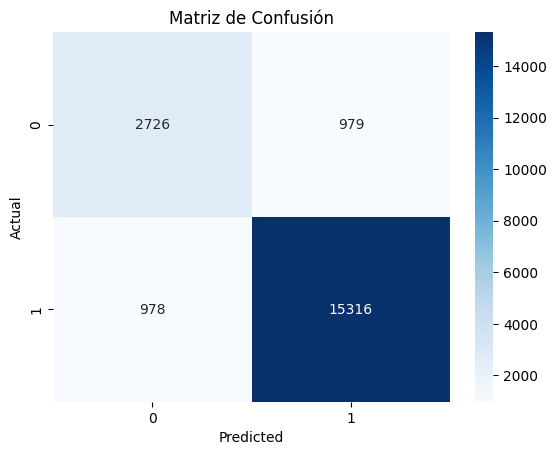


🔧 Entrenando modelo: BiLSTM
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2250/2250 ━━━━━━━━━━━━━━━━━━━━ 30s 12ms/step - accuracy: 0.8781 - loss: 0.2934 - val_accuracy: 0.9110 - val_loss: 0.2185
Epoch 2/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - accuracy: 0.9279 - loss: 0.1805 - val_accuracy: 0.9137 - val_loss: 0.2173
Epoch 3/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9415 - loss: 0.1474 - val_accuracy: 0.9124 - val_loss: 0.2325
Epoch 4/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.9548 - loss: 0.1190 - val_accuracy: 0.9119 - val_loss: 0.2529
Epoch 5/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - accuracy: 0.9631 - loss: 0.0955 - val_accuracy: 0.9043 - val_loss: 0.2881

📈 Evaluando modelo: BiLSTM
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
🔍 Métricas de evaluación:
Accuracy: 0.904245212260613
Precision: 0.9361237488626024
Recall: 0.9470970909537253
F1 Score: 0.9415784496171329
ROC-AUC: 0.932128026394886

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72     

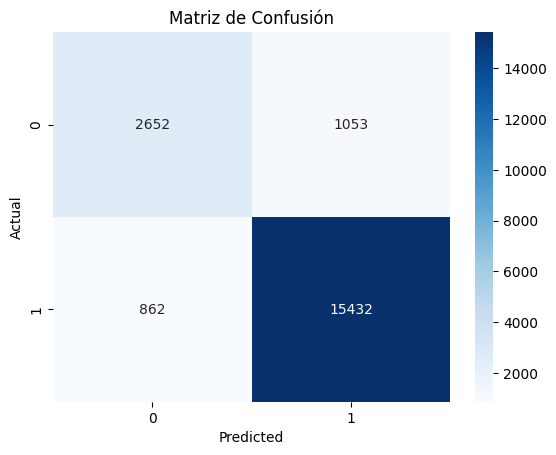

In [ ]:
#Bloque de entrenamiento mas modular al incluir la parte de evaluacion mas completa

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, SimpleRNN, Bidirectional, Dense
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# ========== PARÁMETROS ==========
EMBEDDING_DIM = 100
EPOCHS = 5
BATCH_SIZE = 32
NUM_CLASSES = 1
LOSS_FN = 'binary_crossentropy'
ACTIVATION_FN = 'sigmoid'
THRESHOLD = 0.5

# ========== CONSTRUCTORES DE MODELO ==========
def build_simple_rnn(vocab_size, max_len):
    return Sequential([
        Embedding(vocab_size, EMBEDDING_DIM, input_length=max_len),
        SimpleRNN(64),
        Dense(NUM_CLASSES, activation=ACTIVATION_FN)
    ])

def build_lstm(vocab_size, max_len):
    return Sequential([
        Embedding(vocab_size, EMBEDDING_DIM, input_length=max_len),
        LSTM(64),
        Dense(NUM_CLASSES, activation=ACTIVATION_FN)
    ])

def build_gru(vocab_size, max_len):
    return Sequential([
        Embedding(vocab_size, EMBEDDING_DIM, input_length=max_len),
        GRU(64),
        Dense(NUM_CLASSES, activation=ACTIVATION_FN)
    ])

def build_bilstm(vocab_size, max_len):
    return Sequential([
        Embedding(vocab_size, EMBEDDING_DIM, input_length=max_len),
        Bidirectional(LSTM(64)),
        Dense(NUM_CLASSES, activation=ACTIVATION_FN)
    ])

model_constructors = {
    "SimpleRNN": build_simple_rnn,
    "LSTM": build_lstm,
    "GRU": build_gru,
    "BiLSTM": build_bilstm
}

# ========== EVALUACIÓN COMPLETA ==========
def evaluar_modelo_keras(model, X_test, y_test, threshold=0.5):
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > threshold).astype("int32").flatten()

    print("🔍 Métricas de evaluación:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

    print("\n📊 Classification Report:")
    print(classification_report(y_test, y_pred))

    print("\n🧩 Matriz de Confusión:")
    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Matriz de Confusión")
    plt.show()

    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_pred_proba),
        "confusion_matrix": matrix,
        "y_pred": y_pred
    }

# ========== ENTRENAMIENTO Y EVALUACIÓN DE TODOS LOS MODELOS ==========
results = {}

for model_name in model_constructors:
    print(f"\n🔧 Entrenando modelo: {model_name}")
    model = model_constructors[model_name](vocab_size, max_len)
    model.compile(optimizer='adam', loss=LOSS_FN, metrics=['accuracy'])

    history = model.fit(
        X_train, y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_split=0.1,
        verbose=1
    )

    print(f"\n📈 Evaluando modelo: {model_name}")
    resultados = evaluar_modelo_keras(model, X_test, y_test, threshold=THRESHOLD)

    results[model_name] = {
        "model": model,
        "metrics": resultados
    }


**METRICAS PARA COMPARAR RNN/LSTM**

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Accuracy: 0.904245212260613
Precision: 0.9361237488626024
Recall: 0.9470970909537253
F1 Score: 0.9415784496171329
ROC-AUC: 0.932128026394886


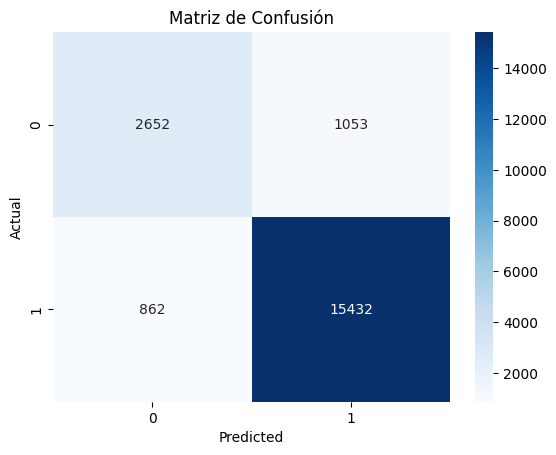

In [ ]:
#Metricas OK

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Si tus predicciones son probabilidades:
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32")

# Etiquetas reales: y_test

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

# Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()
